# Data Normalization

Feature scaling is important when we have variables that have been measured on very different scales. Many statistical algorithms and Machine Learning algorithms struggle to process data when there are large differences in the scale on which variables/ features are measured. Normalising the data will not transform our variables and make them normally distributed if they deviate from normality but it helps models such as linear and logistic regression to perform better. 

Here I will demonstrate two methods of normalization scaling: Max Absolute Scaling and Min-Max Scaling. 

## Max Absolute Scaling

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('whitewine.csv')

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.7,0.62,0.24,1.10,0.039,6.0,62.0,0.99340,3.41,0.32,10.400000,5,white
1,5.7,0.22,0.20,16.00,0.044,41.0,113.0,0.99862,3.22,0.46,8.900000,6,white
2,5.9,0.19,0.26,7.40,0.034,33.0,123.0,0.99500,3.49,0.42,10.100000,6,white
3,5.3,0.47,0.10,1.30,0.036,11.0,74.0,0.99082,3.48,0.54,11.200000,4,white
4,6.4,0.29,0.21,9.65,0.041,36.0,119.0,0.99334,2.99,0.34,10.933333,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.1,0.28,0.24,19.95,0.074,32.0,174.0,0.99922,3.19,0.44,9.300000,6,white
4894,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.000000,7,white
4895,6.9,0.25,0.29,2.40,0.038,28.0,76.0,0.99088,3.01,0.36,11.700000,7,white
4896,7.1,0.26,0.31,2.20,0.044,29.0,128.0,0.99370,3.34,0.64,10.900000,8,white


In [3]:
# Looking at the free sulfur dioxide and total sulfur dioxide variables it is clear that the scales are very large
# With a big difference between the min and max values. 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


C:\Users\robert65\AppData\Local\Temp\ipykernel_12788\661626722.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['free sulfur dioxide'])


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

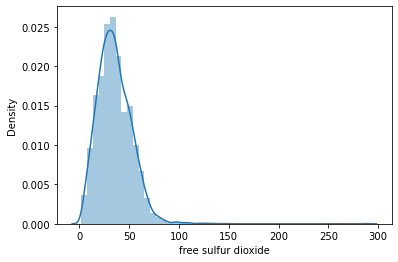

In [4]:
# Obtaining a distribution plot of free sulfer dioxide:

sns.distplot(df['free sulfur dioxide'])

# We can see that this variable is measured on a scale from 0 to about 300. 

In [5]:
# Max Absolute Scaling:
# The formula for this is:
# scaled_value = value / max abs value

# Making a copy of the data frame:

df_temp = df.copy()

In [6]:
# Creating the new scaled variable:

df_temp['free sulfur dioxide'] = df_temp['free sulfur dioxide'] / df_temp['free sulfur dioxide'].abs().max()

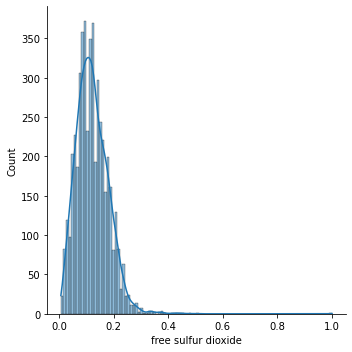

In [7]:
sns.displot(df_temp['free sulfur dioxide'], kde = True)

# We can now see that the variable has been rescaled on the x-axis and is now measured between 0 and 1.

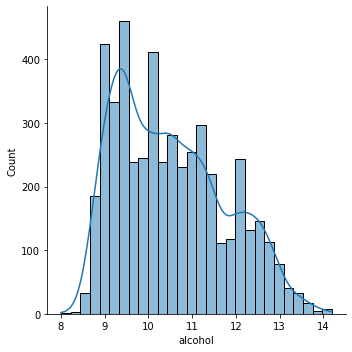

In [8]:
# Performing Max Abs Scaling on the alcohol variable using the original data frame:

sns.displot(df['alcohol'], kde = True)

# You can see on this plot that the range of scores goes from 8 to 14. 

In [9]:
# Performing Max Abs Scaling on alcohol: 
df_temp['alcohol'] = df_temp['alcohol'] / df_temp['alcohol'].abs().max()

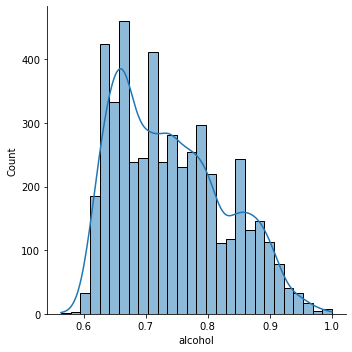

In [10]:
sns.displot(df_temp['alcohol'], kde=True)

# We can see in the plot that the scale is now in the range 0 to 1 but the min value is not 0.
# It start at around 0.55. 
# If we want to put all values on a scale from the min value at 0 to the max value at 1 we have to use Min Max Scaling.  

# Note: If we want to get the orginal value back we can just use some algebra and the below formula:
# original_value  = scaled_value * max

## Min-Max Scaling

This is the standard normalisation technique that it used in Machine Learning. 

In [11]:
# The formula for min-max scaling is:

# scaled_value = (value - min) / (max - min)
# e.g. min = 160, max = 200
# min: 160 - 160 / 200 - 160 = 0 / 40 = 0
# max: 200 - 160 / 200 - 160 = 40 / 40 = 1

# Making a copy of the data again:

df_temp2 = df.copy()

In [12]:
# We can perform this scaling manually:

df_temp2['alcohol'] = (df_temp2['alcohol'] - df_temp2['alcohol'].min()) / (df_temp2['alcohol'].max() - df_temp2['alcohol'].min())

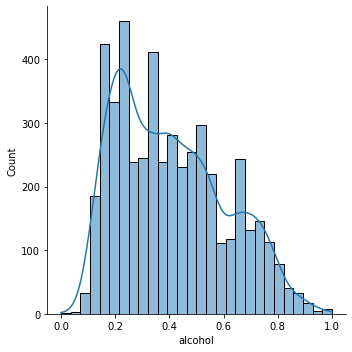

In [13]:
# Again obtaining the distribution plot. 
# We can now see the x-axis scale is different and the min value and max value are 0 and 1 respectively. 
sns.displot(df_temp2['alcohol'], kde=True)

# Note: we could reverse the min-max scaling of this variable with a bit of algebra and applying the formula:
# original_value = scaled_value * (max - min) + min